# Concrete Strength Prediction

## Background
Concrete is the most important material in civil engineering. According to the researchers producing the data set for this study, the concrete compressive strength is a highly nonlinear function of age and ingredients. The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory.

## Data
* Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
* Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
* Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
* Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
* Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
* Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
* Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
* Age -- quantitative -- Day (1~365) -- Input Variable
* Concrete compressive strength -- quantitative -- MPa -- Output Variable 

Source: https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/

## Objective
To predict the concrete strength using the data available the data source. Apply feature engineering and model tuning to obtain 80% to 95% of R2score.

(this notebook loaded to GitHub at https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-pierssmith/tree/master/Week%2013%20-%20Project%20-%20Model%20Tuning)

#  
---
# 1 - Import libraries and load dataset
---

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR


In [2]:
df_abt_ConcreteData = pd.read_csv('concrete.csv')

In [3]:
df_abt_ConcreteData.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [4]:
df_abt_ConcreteData.tail()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  
1025     13.29  
1026     41.30  
1027     44.28  
1028     55.06  
1029     52.61

In [5]:
df_abt_ConcreteData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


#### Load summary
The dataset contains 1030 observations. There are 9 columns, all loaded as numeric, and no nulls.

#  
---
# 2 - Deliverables
---

---
# Deliverable 1 (exploratory data quality report)
---

## Deliverable 1.1 - Univariate analysis

## Understanding the domain

Concrete is a mixture of a binder (cement) which hardens in presence of water, water (required to make concrete workable and then harden), aggregate for structure, and additives to change properties.
This dataset has
- Binder (cement, ash)
- Water (water)
- Aggregates (slag, coarseagg, fineagg)
- Additives (superplastic)

The ratios of these elements change for different purposes - higher strengths come at a higher cost and time to strengthen. However, a scan of industry and research data suggests some convergence on commonly accepted ratios - this will be useful for giving us a sense of whether the ranges of the independent variables make sense. Typically, 1 cubic metre of concrete will contain;
- Cement - 350kg 
- Water - beween 130 and 150 litres (kg)
- Fine aggregate - 700kg
- "Chippings"/coarse aggregate - 1200kg

The typical weight is 2500kg for 1 cubic metre.

Concrete is then set before being subjected to load - the time range depends on the materials. There are industry standards however, that prescribe times at which strength measures must be taken and how they are taken.

In [6]:
df_abt_ConcreteData.describe().transpose()

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

##### Binders (cement: 102 - 540; ash: 0 - 200.1)
The ranges for binders don't suggest any obvious errors in the data. Ash is a substitute, so can be expected to have a minimum of 0 (where only cement is used), and the range of cement is consistent with this dataset being the result of experimentation with different element ratios.

##### Water (water: 121.8 - 247)
Water is used in different quantities to produce different 'workability' results for the concrete. More water makes the concrete easier to work with, however water content that is too high is known to reduce strength (Abram's ratio, as noted below). The high point of 247 suggests an experimental mix, but the mean is in the expected range.

##### Aggregates (fineagg: 594 - 824; coarseagg: 801 - 1029.4; slag: 0 - 359.4)
Aggregates give the concrete its structure - finer aggregates can increase strength as there are fewer 'gaps' in the mixture, and also reduce permeability. Fine and coarse are used in different ratios and the ranges appear correct. Slag is used as an alternative for fine aggregates.

##### Additives (superplastic: 0 - 32.2)
Superplastiser is used to reduce the amount of water required to maintain workability in the concrete. This means higher final strength, while still being able to be 'worked'. In this sense, superplastiser is expected to be negatively correlated with water in the data, as it is a replacement.

##### Age (age: 1 to 365 days)
As noted above, the process of concrete hardening ('hydration') happens over a period of time, with the point at which maximum strength is reached depending on the mix. In this data, 'age' is capturing the point at which the concrete was tested, to produce the compressive strength score.

##### Strength (strength: 2.33 - 82.6)
Concrete must meet standards of compressive strength for different uses. The range here suggests some very low quality concrete resulted from some of the mixtures (anything below 15 MPa would only be considered for use as "fill"). The minimum strength for uses like footpaths and steps is around 18 MPa, so the minimum value here of 2.33 would not be viable for any real use. At the other end, 82.6 is extremely strong, and would be suitable for high-rise construction.

##### Total weight
Although each observaiton is for 1 cubic metre of concrete, the final total weights vary to the density of the materials. To check that the range of observations for total weight are in the expected range based on domain knowledge, the total weight is calculated below.

In [7]:
df_set_ConcreteData = df_abt_ConcreteData.copy()

df_set_ConcreteData['totalweight'] = df_set_ConcreteData.loc[:, 'cement':'fineagg'].sum(1)

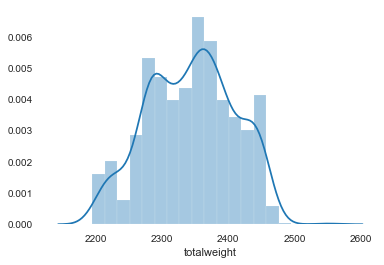

In [8]:
sns.distplot(df_set_ConcreteData['totalweight']);

In [9]:
df_set_ConcreteData['totalweight'].describe()

count    1030.000000
mean     2343.523398
std        65.365356
min      2194.600000
25%      2291.150000
50%      2349.100000
75%      2390.400000
max      2551.000000
Name: totalweight, dtype: float64

Based on all the data points that are given as kg per cubic metre mixture, the total weights are in a range from 2194.6 to 2551kg - which is consistent with the expected range. Lower weights could suggest higher proportions of lower density materials.

In summary, all the observations appear to fit with our domain knowledge for concrete, and the nature of this dataset as experimental.

## Profiling Report

In [10]:
pandas_profiling.ProfileReport(df_abt_ConcreteData)

- Dataset has 9 columns, 1030 rows
- All variables are continuous, 8 have been classified as float and 1 integer (age)
- No missing values
- There are 25 duplicate rows - this suggests the same mix was tried more than once
- 7 variables are input variables, measuring characteristics of the concrete - cement, slag, ash, water, superplastic, coarseagg, fineagg - the other variable age records the period of hydration before testing
- 1 output variable - strength - measures the compressive strength of the concrete resulting from the mixture of inputs
- all the variables measuring characteristics of the concerete are measuring kg per cubic metre mixture (e.g. they are all on the same scale)
- the sampling is from a laboratory study - measuring effect of different mixutres on compressive strength. Experimental nature - this means we should expect variance in some components, as researchers tried different mixtures

#### Depth vs breadth
A dataset of only 1030 samples may on the surface appear to present some challenges for prediction. A larger set of samples would be preferable, however in practice concrete mixtures follow a pattern - in fact in the industry there are prescribed ratios for producing concrete for specific purposes, and there is always binder, water, aggregate in similar proportions. So, although the dataset is small we may still be able to build a good predictive model.

## Independent Variables

### cement

This variable is a float, range is 102.0 to 504.0, mean is 281.17 with standard deviation of 104.51. The median of 272.9 shows slight right skew, but skewness of 0.51 suggests this is moderate, and there are no outliers.

In [11]:
df_abt_ConcreteData['cement'].describe()

count    1030.000000
mean      281.167864
std       104.506364
min       102.000000
25%       192.375000
50%       272.900000
75%       350.000000
max       540.000000
Name: cement, dtype: float64

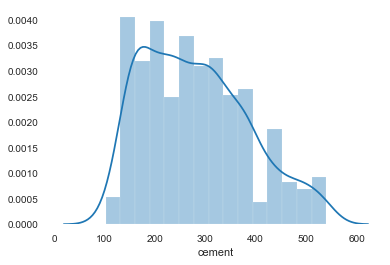

In [12]:
sns.distplot(df_abt_ConcreteData['cement']);

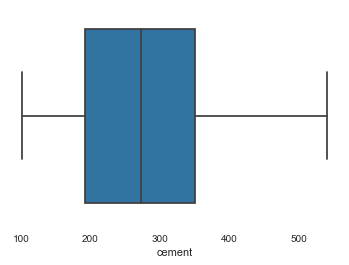

In [13]:
sns.boxplot(df_abt_ConcreteData['cement']);

### slag

This variable is a float, in the range 0 to 359.4. As noted in our domain exploration above, concrete can have no slag, so the minimum of 0 is not unexpected. Slag is an alternative form of fine aggregate - a finely ground byproduct of smelting. Domain knowledge suggests it is correlated with low initial strength and high setting time, which is worth considering in bivariate analysis. The mean is 73.89 and median is 22, so right skewed (skewness 0.8). Cause is that 471 (45.7%) of the observations are 0, which means the tested concrete mixture contained no slag. This creates the two Gaussians observed in the distribution plot. There are outlying values at the top of the range.

In [14]:
df_abt_ConcreteData['slag'].describe()

count    1030.000000
mean       73.895825
std        86.279342
min         0.000000
25%         0.000000
50%        22.000000
75%       142.950000
max       359.400000
Name: slag, dtype: float64

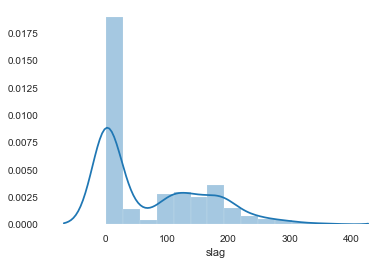

In [15]:
sns.distplot(df_abt_ConcreteData['slag']);

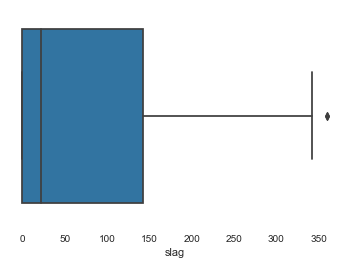

In [16]:
sns.boxplot(df_abt_ConcreteData['slag']);

### ash

This variable is a float, with observations in a range from 0 to 200.1. Mean is 54.19 but median is 0 - 566 observations (55.0%) are zeros, which produces the two gaussians observed in the plot. Fly ash is a byproduct of the type of coal burning done in power generation plants - when mixed with lime and water it forms a binder, and can be used as a substitute for cement.

In [17]:
df_abt_ConcreteData['ash'].describe()

count    1030.000000
mean       54.188350
std        63.997004
min         0.000000
25%         0.000000
50%         0.000000
75%       118.300000
max       200.100000
Name: ash, dtype: float64

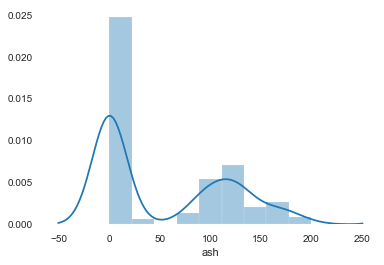

In [18]:
sns.distplot(df_abt_ConcreteData['ash']);

### water

This variable is a float, with observations ranging from 121.8 to 247.0. Distribution looks normal, with mean of 181.56 with standard deviation of 21, and median of 185 and a skewness of 0.07.

In [19]:
df_abt_ConcreteData['water'].describe()

count    1030.000000
mean      181.567282
std        21.354219
min       121.800000
25%       164.900000
50%       185.000000
75%       192.000000
max       247.000000
Name: water, dtype: float64

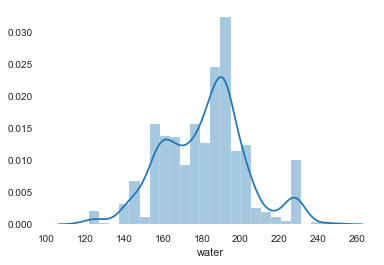

In [20]:
sns.distplot(df_abt_ConcreteData['water']);

### superplastic

This is a float variable with observations in a range from 0 to 32.2. Mean of 6.2, and distribution is highly right skewed with evidence of outliers (skewness 0.9). 379 observations (36.8%) are zero, so as with all the optional/substitute elements this creates a plot with two Gaussians. Superplasticizers allow the amount of water (water/cement ration) needed to ensure workability - water is required not just for hydration, and lower water means harder workability. Reducing water increases strength.

In [21]:
df_abt_ConcreteData['superplastic'].describe()

count    1030.000000
mean        6.204660
std         5.973841
min         0.000000
25%         0.000000
50%         6.400000
75%        10.200000
max        32.200000
Name: superplastic, dtype: float64

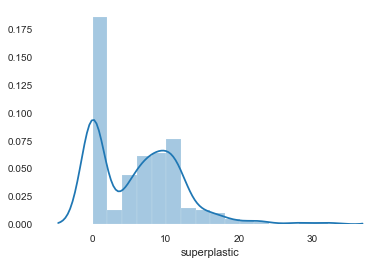

In [22]:
sns.distplot(df_abt_ConcreteData['superplastic']);

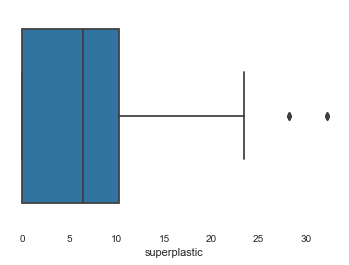

In [23]:
sns.boxplot(df_abt_ConcreteData['superplastic']);

### coarseagg

Float variable, observations in the range 801.0 to 1145.0, mean of 972.91, and standard deviation of 77.75. Distribution appears normal, with a median of 968 and skewness of -0.04.

In [24]:
df_abt_ConcreteData['coarseagg'].describe()

count    1030.000000
mean      972.918932
std        77.753954
min       801.000000
25%       932.000000
50%       968.000000
75%      1029.400000
max      1145.000000
Name: coarseagg, dtype: float64

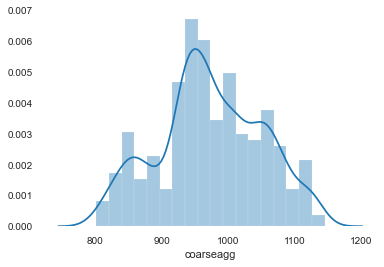

In [25]:
sns.distplot(df_abt_ConcreteData['coarseagg']);

### fineagg

Float variable, observations in the range 594.0 to 992.6, and a mean of 773.58. Distribution appears have a slight left skew, with a median of 779.5 and skewness of -0.25. Some outliers are observed.

In [26]:
df_abt_ConcreteData['fineagg'].describe()

count    1030.000000
mean      773.580485
std        80.175980
min       594.000000
25%       730.950000
50%       779.500000
75%       824.000000
max       992.600000
Name: fineagg, dtype: float64

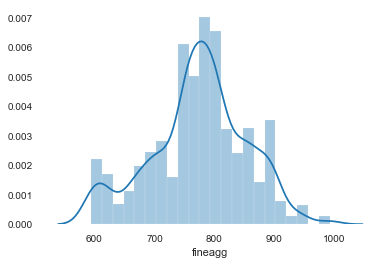

In [27]:
sns.distplot(df_abt_ConcreteData['fineagg']);

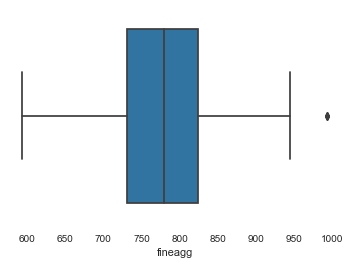

In [28]:
sns.boxplot(df_abt_ConcreteData['fineagg']);

### age

Integer variable - measures in days the aging of the concrete before testing. Range is 1 day to 365 days. 425 of the observations (41.3%) were for 28 days, with some clusters of observations approaching the maximum value (14 observations at 365 days). The distribution is heavily right skewed, with skewness of 3.27 - presence of outliers puts mean at 45.66 with the median on 28 (with 41.3% of the observations). As this is representing the age at which concrete was tested, and the concentration of observations on a single value suggests this will be more useful as a categorical variable - binning may be a good strategy, as there is no sense in dropping outliers as the dataset is so small, and there are still reasonable clusters of observations at the high end of the range - observable in the distribution plot visualisation.

According to section 19.2.1.3 of ACI 318-19 the specified compressive strength shall be based on the 28-day test results unless otherwise specified in the construction documents. 3- or 7-day test results are used to monitor early strength gain, especially when high early-strength concrete is used. However, 3- and 7-day test results are not commonly used for acceptance purposes.

28 days comes from the standards - this explains higher concentration of values. Clearly the experimentation with earlier times is to identify mixes that achieve higher strength without requiring as much time before the concrete can be loaded.

In [29]:
df_abt_ConcreteData['age'].describe()

count    1030.000000
mean       45.662136
std        63.169912
min         1.000000
25%         7.000000
50%        28.000000
75%        56.000000
max       365.000000
Name: age, dtype: float64

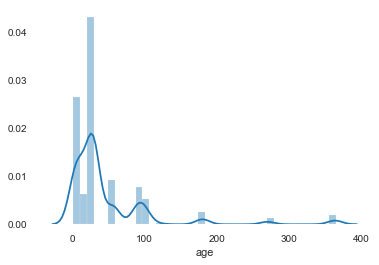

In [30]:
sns.distplot(df_abt_ConcreteData['age']);

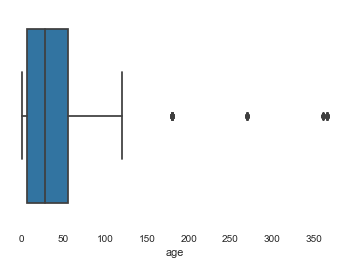

In [31]:
sns.boxplot(df_abt_ConcreteData['age']);

## Dependent variable

### strength

The dependent variable, measures the compressive strength of the concrete in MPa. Variable is float with observations in the range 2.33 to 82.6. 82% observations are unique. Mean is 35.82 and standard deviation is 16.7. Moderately right skewed - Q3 is 46.135 with an IQR of 22.425, and skewness of 0.42. Range of observations is interesting - the ACI 318 Standard (Section 19.2.1.1) indicates a minimum specified compressive strength of  2500  psi (17.236 MPa)  for  structural  concrete. Below 2000 psi (13.79 Mpa) would only be indicated for use as fill. Suggests many tests in this study resulted in extremely low quality concrete.

In [32]:
df_abt_ConcreteData['strength'].describe()

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: strength, dtype: float64

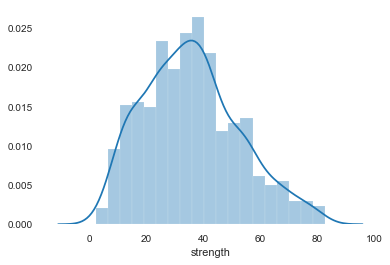

In [33]:
sns.distplot(df_abt_ConcreteData['strength']);

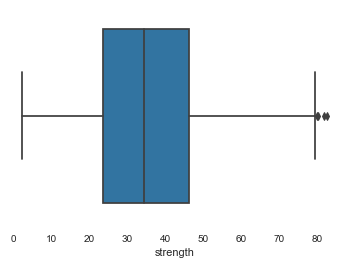

In [34]:
sns.boxplot(df_abt_ConcreteData['strength']);

##  
---
## Deliverable 1.2 - Bivariate analysis

Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. (10 marks)

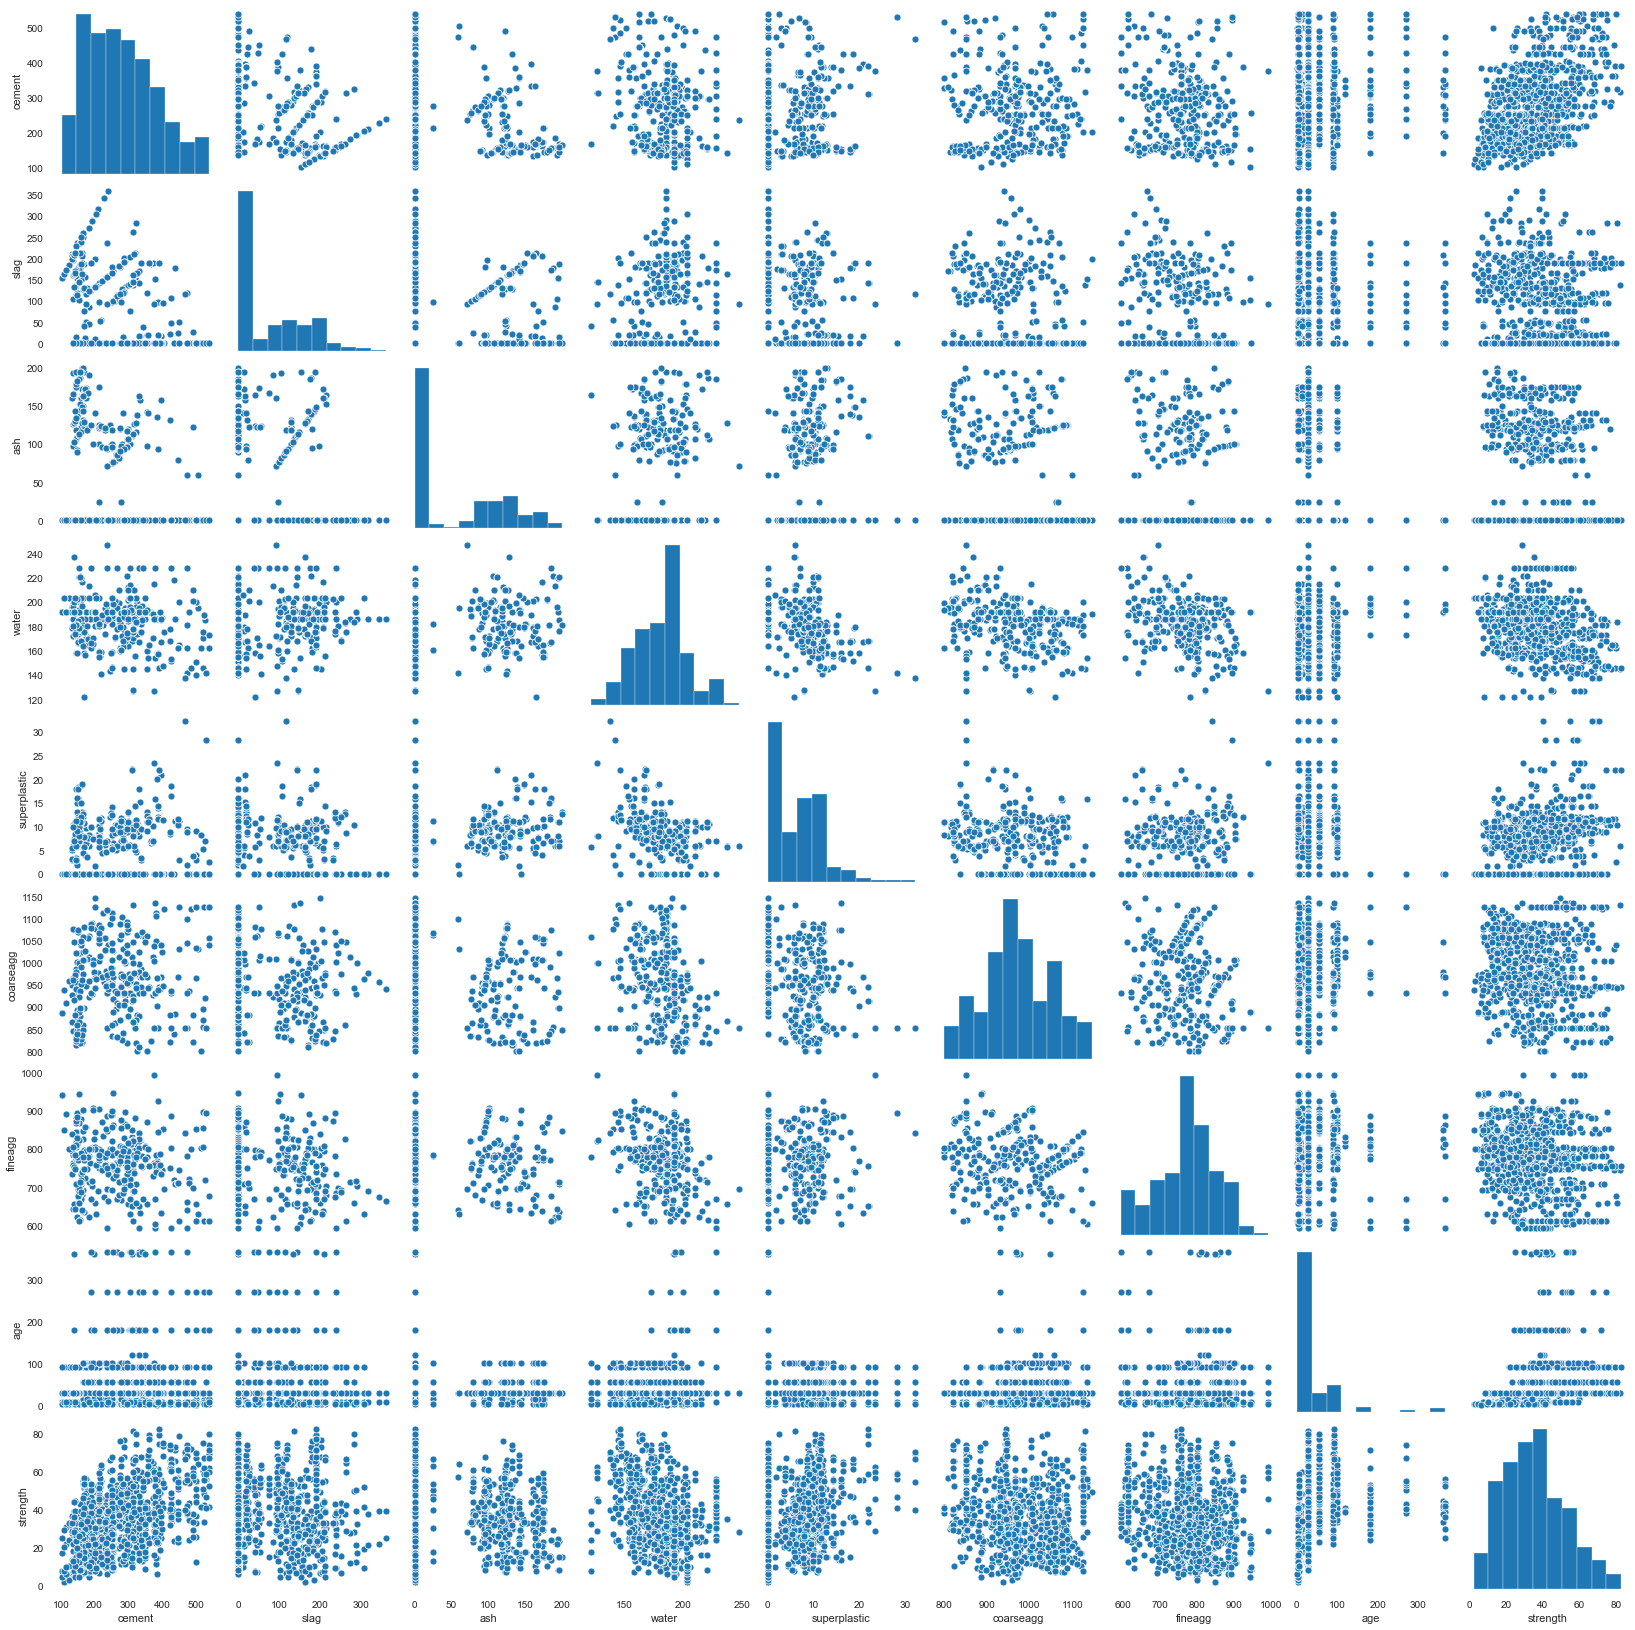

In [35]:
sns.pairplot(df_abt_ConcreteData);

The plots for age support the assessment above that this will be more useful as a categorical variable. 

The expected relationship between water and superplastic that was elaborated in the domain exposition above is observed.

Concrete appears to be related to strength. No other obvious effect of any individual variable on strength is observed - thsi supports what we know from domain knowledge about tradeoffs in concrete.

### Correlation

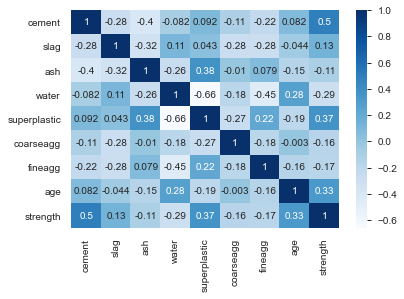

In [36]:
corr = df_abt_ConcreteData.corr() 
sns.heatmap(corr, annot=True, cmap='Blues');

There is a high correlation between strength and cement, which again is supported by domain knowledge.

In terms of the correlations between independent variables, moderate correlations are observed for;
- cement and ash (-0.4) - EXPECTED both are binders (-0.4 not typically a moderate, but from domain understanding these are both binders in a concrete mix, with fly ash being a substitute for cement, so it stands to reason that within a range of proportional measures (kg per cubic metre) they would be inversely correlated. To be considered in feature engineering
- water and fineagg (-0.45) - strength can be increased by increasing cement and reducing sand (fineagg) - more cement means more water for hydration and workability. 
- superplastic and water (-0.66) - EXPECTED superplastics are used to reduce water required for workability. This was noted in the domain exploration, and is now supported in the data.

A weak correlation is observed for superplastic and ash (0.38)

### Dependent vs independent variables

### Water/cement ratio vs strength

The first relationship to consider is "Abrams' law" which is a concept in civil engineering which states that the ratio water/cement is inversely related to strength. This is known as the "Water of convenience" tradeoff - more water makes the concrete easier to work with, but it reduces the final strength. Superplastisers help overcome this tradeoff, by reducing the amount of water required to ensure workability.

In [37]:
df_set_WaterCementRatio = df_abt_ConcreteData.copy()

df_set_WaterCementRatio['wcratio'] = df_set_WaterCementRatio['water'] / df_set_WaterCementRatio['cement']

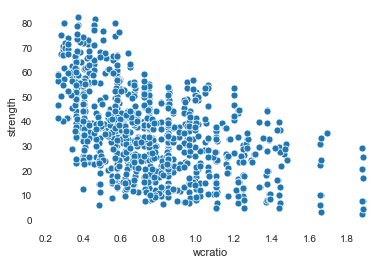

In [38]:
sns.scatterplot(df_set_WaterCementRatio['wcratio'], df_set_WaterCementRatio['strength']);

The plot of the water/cement ratio against strength shows there is high variance in strength at different ratios, however there is an observable trend that a higher water/cement ratio reduces strength.

### Cement and ash vs strength

From domain understanding - fly ash is a substitute at lower cost, does it affect strength?


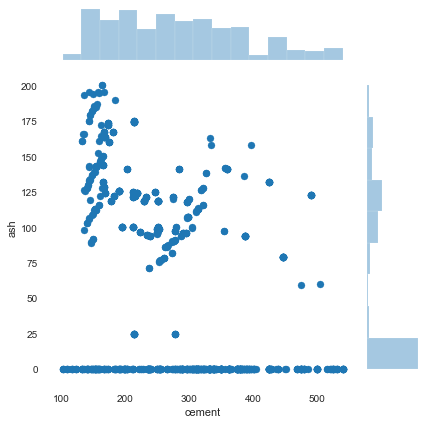

In [39]:
sns.jointplot(df_set_ConcreteData['cement'], df_set_ConcreteData['ash']);

Recall that median for ash is 0 - 566 (55.0%) zeros. The majority of samples did not use fly ash as the binder alongside cement. However, where fly ash was used, there is an observable cluster of high fly ash being correlated with lower cement - supports this understanding of the data. But, is fly ash correlated with strength?

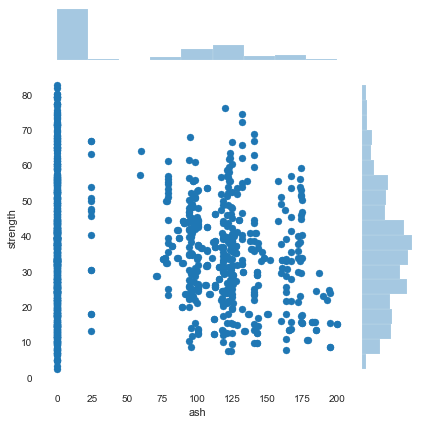

In [40]:
sns.jointplot(df_set_ConcreteData['ash'], df_set_ConcreteData['strength']);

As was noted in the analysis of the pairplot above, there is no observable relationship between ash and strength. So while the data shows ash is used as a substitute, this would appear to be a choice driven by cost, rather than benefits in strength.

### Age vs strength

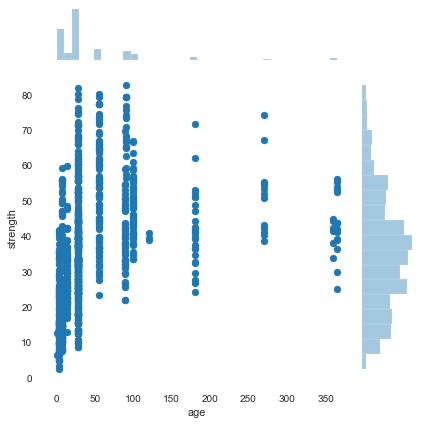

In [41]:
sns.jointplot(df_set_ConcreteData['age'], df_set_ConcreteData['strength']);

In [42]:
df_set_AgeStrength = df_abt_ConcreteData.copy()

bin_edges=[1,14,28,56,180,365]

bin_names=['up to 2 weeks','2 to 4 weeks', '4 to 8 weeks','8 weeks to 6 months', 'up to 1 year']

df_set_AgeStrength['age-bin'] = pd.cut(df_set_AgeStrength['age'],bin_edges,labels=bin_names)

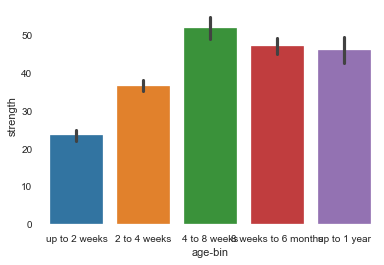

In [43]:
sns.barplot(df_set_AgeStrength['age-bin'], df_set_AgeStrength['strength']);

Standards for concretee are based on tests at periods of time up to target strength, and some mixtures are known to produce longer times to maximum strength. There is an observable trend showing strength increasing up to 4-8 weeks of hydration, after which it stabilises.

### Slag vs strength

From the domain knowledge, slag is a form of fine aggregate, which can take longer to set but can produce higher strength concrete. Here, we'll examine the percentage of slag in the total weight of the mixture, and bin it and plot against strength.

In [44]:
df_set_ConcreteData['totalweight'].describe()

count    1030.000000
mean     2343.523398
std        65.365356
min      2194.600000
25%      2291.150000
50%      2349.100000
75%      2390.400000
max      2551.000000
Name: totalweight, dtype: float64

In [45]:
df_set_ConcreteData['%slag'] = (df_set_ConcreteData['slag'] / df_set_ConcreteData['totalweight'])*100
df_set_ConcreteData.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  totalweight     %slag  
0     29.89       2277.1  9.310087  
1     23.51       2381.5  1.771992  
2     29.22       2356.7  0.000000  
3     45.85       2210.0  5.158371  
4     18.29       2284.7  8.027312

In [46]:
df_set_ConcreteData['%slag'].describe()

count    1030.000000
mean        3.164319
std         3.696075
min         0.000000
25%         0.000000
50%         0.945464
75%         6.197229
max        15.033883
Name: %slag, dtype: float64

In [47]:
bin_edges=[-1,0,5,10,15]

bin_names=['None','<= 5%', '<= 10%','over 10%']

df_set_ConcreteData['%slag-bin'] = pd.cut(df_set_ConcreteData['%slag'],bin_edges,labels=bin_names)

In [48]:
df_set_ConcreteData.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  totalweight     %slag %slag-bin  
0     29.89       2277.1  9.310087    <= 10%  
1     23.51       2381.5  1.771992     <= 5%  
2     29.22       2356.7  0.000000      None  
3     45.85       2210.0  5.158371    <= 10%  
4     18.29       2284.7  8.027312    <= 10%

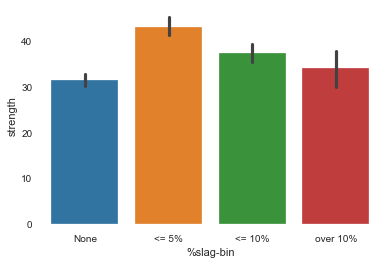

In [49]:
sns.barplot(df_set_ConcreteData['%slag-bin'], df_set_ConcreteData['strength']);

There is an increase in strength when slag is added (increase from 'None' to < 5%), however the plot shows strength decreasing as more is added.

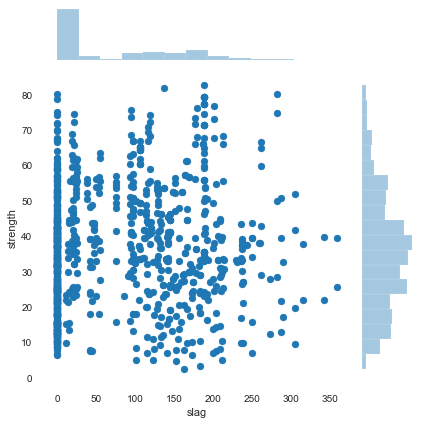

In [50]:
sns.jointplot(df_set_ConcreteData['slag'], df_set_ConcreteData['strength']);

It's difficult to attribute a trend in strength to the use of slag. This again reinforces that no individual elements (other than cement) predict the final strength of concrete - it's the ratio of all the elements.

##  
---
## Deliverable 1.3 - Feature engineering techniques

### 1.3.1 Features

### Scaling strategy

Firstly I'll consider two approaches to scaling the data. The exploratory data analysis above has established that there are no individual elements, other than cement, which have any sort of predictive relationship to strength. This supports what is established in the domain exploration, and in the summary from the researchers, that the relationship is complex.

All the observations for the concrete elements are on the same scale - kg per cubic metre. However, since the ratio between the elements is going to be significant for this analysis, and outliers were observed in the analysis of the independent variables, two scaling strategies will be tried - based on ratios being critical, both strategies will bring the data into the range 0 to 1. The first will be to scale the data into the ratio of each element against the total weight of the mixture (this eliminates the variance in density and therefore total weight, since this data is not known). The second will be to use MinMax scaler. These two will be compared with a quick KNN analysis to determine the best strategy.

In terms of outlier treatment, the context is important as well - this is experimental data (a laboratory study). This is also a small dataset, so dropping risks losing information, and imputing changes the distribution - for some variables like slag, ash, and superplastic that are mostly at 0, removing the outliers risks biassing the data by removing the few observations that do contain data. For example, imputing a median value for an outlier in water changes the water/cement ratio (reduces water, increases the implied strength based on Abram's Law, reduces the weight of the cubic metre of concrete) biases the data. Imputing a median value for slag changes the ratio of aggregates, and strength - would produce records suggesting lower slag increases strength, which is the opposite of the relationship predicted in the analysis above. As such, the outliers will not be dropped or imputed, but the data will be scaled.

First, as was noted in the EDA above, 'age' is actually a categorical variable, with large numbers of observations clustered around days that are driven externally, by industry standards (such as the cluster of observations at 28 days). The binning strategy will be as follows;
- up to 7 - 1 week
- up to 14 - 2 weeks
- up to 28 - 4 weeks - the industry standard, and most common observation
- up to 56 - 8 weeks - Q3
- up to 180 - 95th percentile
- up to 365

In [51]:
df_set_ConcreteData = df_abt_ConcreteData.copy()

bin_edges=[0,7,14,28,56,180,365]
bin_labels=["up to 1 week", "up to 2 weeks", "up to 4 weeks", "up to 8 weeks", "up to 6 months", "up to 1 year"]
df_set_ConcreteData['age'] = pd.cut(df_set_ConcreteData['age'],bin_edges,labels=bin_labels)

df_set_ConcreteData['age'].value_counts()

up to 4 weeks     425
up to 1 week      262
up to 6 months    157
up to 8 weeks      91
up to 2 weeks      62
up to 1 year       33
Name: age, dtype: int64

#### Strategy 1 - scale all the 'component' independent variables to a ratio of total weight

In [52]:
df_set_ConcreteRatioData = df_set_ConcreteData.copy()
df_set_ConcreteRatioData['totalweight'] = df_set_ConcreteRatioData.loc[:, 'cement':'fineagg'].sum(1)

concreteIngredients = ["cement", "slag", "ash", "water", "superplastic", "coarseagg", "fineagg"]
for i in concreteIngredients:
    df_set_ConcreteRatioData['%' + i] = (df_set_ConcreteRatioData[i] / df_set_ConcreteRatioData['totalweight'])
    
df_set_ConcreteRatioData.drop(df_set_ConcreteRatioData.loc[:, 'cement':'fineagg'], inplace = True, axis = 1)
df_set_ConcreteRatioData.drop(['totalweight'], axis=1, inplace=True)

df_set_ConcreteRatioData.head()

age  strength   %cement     %slag      %ash    %water  \
0  up to 4 weeks     29.89  0.062053  0.093101  0.000000  0.089368   
1  up to 2 weeks     23.51  0.070922  0.017720  0.052194  0.066471   
2  up to 4 weeks     29.22  0.106081  0.000000  0.040608  0.079518   
3  up to 4 weeks     45.85  0.120362  0.051584  0.000000  0.103167   
4  up to 4 weeks     18.29  0.067755  0.080273  0.000000  0.084606   

   %superplastic  %coarseagg  %fineagg  
0       0.000000    0.426771  0.328708  
1       0.004535    0.453832  0.334327  
2       0.002334    0.406034  0.365426  
3       0.000000    0.421719  0.303167  
4       0.003983    0.458441  0.304942

#### Try a quick KNN model

In [53]:
X_ratio = df_set_ConcreteRatioData.drop(labels=['strength'], axis=1)
y_ratio = df_set_ConcreteRatioData[['strength']]

X_ratio = pd.get_dummies(X_ratio, columns=['age'], drop_first=True)

X_ratio_train, X_ratio_test, y_ratio_train, y_ratio_test = train_test_split(X_ratio, y_ratio, test_size=0.30 , random_state=1)

In [54]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_ratio_train,y_ratio_train)

y_ratio_pred = knn_model.predict(X_ratio_test)
print(knn_model.score(X_ratio_train,y_ratio_train))
print(knn_model.score(X_ratio_test,y_ratio_test))

0.8607294643314816
0.7852636621358338


#### Strategy 2 - MinMax scaler

In [55]:
df_set_ConcreteScaledData = df_set_ConcreteData.copy()


scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_set_ConcreteScaledData[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg']])

df_set_ConcreteScaledData = pd.DataFrame(scaled, columns=['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg'])
df_set_ConcreteScaledData['age'] = df_set_ConcreteData['age']
df_set_ConcreteScaledData['strength'] = df_set_ConcreteData['strength']

df_set_ConcreteScaledData.head()

cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0  0.089726  0.589872  0.000000  0.652556      0.000000   0.496512  0.387607   
1  0.152740  0.117418  0.621189  0.291534      0.335404   0.813372  0.507275   
2  0.337900  0.000000  0.478261  0.523962      0.170807   0.453198  0.670346   
3  0.374429  0.317195  0.000000  0.848243      0.000000   0.380814  0.190667   
4  0.120548  0.510295  0.000000  0.571086      0.282609   0.716279  0.257652   

             age  strength  
0  up to 4 weeks     29.89  
1  up to 2 weeks     23.51  
2  up to 4 weeks     29.22  
3  up to 4 weeks     45.85  
4  up to 4 weeks     18.29

In [56]:
X_minmax = df_set_ConcreteScaledData.drop(labels=['strength'], axis=1)
y_minmax = df_set_ConcreteScaledData[['strength']]

X_minmax = pd.get_dummies(X_minmax, columns=['age'], drop_first=True)

X_minmax_train, X_minmax_test, y_minmax_train, y_minmax_test = train_test_split(X_minmax, y_minmax, test_size=0.30 , random_state=1)

In [57]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_minmax_train,y_minmax_train)

y_minmax_pred = knn_model.predict(X_minmax_test)
print(knn_model.score(X_minmax_train,y_minmax_train))
print(knn_model.score(X_minmax_test,y_minmax_test))

0.8728981251136965
0.8023842216044402


The MinMax scaled data performed slightly better, so this strategy will be used.

### Features

A number of insights have emerged from the EDA and domain exposition to support an insightful approach to engineering some new features.

From research; 
- Water/Cement ratio (Abram's Law)
- Water/Binder ratio (same principle as Abram's Law - since ash is binder, cement + ash)

From the bivariate analysis;
- cement and ash (-0.4) - EXPECTED both are binders (-0.4 not typically a moderate, but from domain understanding these are both binders in a concrete mix, with fly ash being a substitute for cement, so it stands to reason that within a range of proportional measures (kg per cubic metre) they would be inversely correlated. To be considered in feature engineering
- water and fineagg (-0.45) - strength can be increased by increasing cement and reducing sand (fineagg) - more cement means more water for hydration and workability
- superplastic and water (-0.66) - EXPECTED superplastics are used to reduce water required for workability


In [58]:
df_set_ConcreteInsightFeatures = df_set_ConcreteScaledData.copy()

df_set_ConcreteInsightFeatures['water-cement_ratio'] = (df_set_ConcreteData['water'] / df_set_ConcreteData['cement'])
df_set_ConcreteInsightFeatures['water-binder_ratio'] = (df_set_ConcreteData['water'] / (df_set_ConcreteData['cement'] + df_set_ConcreteData['ash']))
df_set_ConcreteInsightFeatures['water-fineagg_ratio'] = (df_set_ConcreteData['water'] / df_set_ConcreteData['fineagg'])
df_set_ConcreteInsightFeatures['ash-cement_ratio'] = (df_set_ConcreteData['ash'] / df_set_ConcreteData['cement'])
df_set_ConcreteInsightFeatures['superplastic-water_ratio'] = (df_set_ConcreteData['superplastic'] / df_set_ConcreteData['water'])

df_set_ConcreteInsightFeatures.head()

cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0  0.089726  0.589872  0.000000  0.652556      0.000000   0.496512  0.387607   
1  0.152740  0.117418  0.621189  0.291534      0.335404   0.813372  0.507275   
2  0.337900  0.000000  0.478261  0.523962      0.170807   0.453198  0.670346   
3  0.374429  0.317195  0.000000  0.848243      0.000000   0.380814  0.190667   
4  0.120548  0.510295  0.000000  0.571086      0.282609   0.716279  0.257652   

             age  strength  water-cement_ratio  water-binder_ratio  \
0  up to 4 weeks     29.89            1.440198            1.440198   
1  up to 2 weeks     23.51            0.937241            0.539905   
2  up to 4 weeks     29.22            0.749600            0.542089   
3  up to 4 weeks     45.85            0.857143            0.857143   
4  up to 4 weeks     18.29            1.248708            1.248708   

   water-fineagg_ratio  ash-cement_ratio  superplastic-water_ratio  
0             0.271877          0.000000                  0.000000  
1             0.198819          0.735938                  0.068225  
2             0.217603          0.382800                  0.029349  
3             0.340299          0.000000                  0.000000  
4             0.277451          0.000000                  0.047077

So, we now have a dataset that is scaled (MinMax), with age now a categorical variable, and five additional features based on domain and bivariate analysis insight.

### 1.3.2 Prepare data model

In [59]:
X = df_set_ConcreteInsightFeatures.drop(labels=['strength'], axis=1)
y = df_set_ConcreteInsightFeatures[['strength']]

X = pd.get_dummies(X, columns=['age'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

Note there that I'm using a 70:30 split, with the intention of doing the cross-validation on the 80 split (test and validation), with the hold out of 20 for testing.

### 1.3.2 Model selection

Bivariate suggests that other than cement, none of the independent variables are individually predictors of strength, and this suggests that simple linear models may not perform well. As such, the model selection for this analysis will begin with a cross validation of several algorithms - linear regression (including ridge and lasso), two boosting algorithms, the decision tree and random forest algorithms which are also less sensitive to relationships observed in the EDA, along with KNN and the support vector regressor. The strategy here is to cross-validate all the models and identify the best performing candidates for feature selection and tuning.

#  
---
# Deliverable 2 (model creation and tuning)
---

##  
---
## Deliverable 2.1 - Algorithm selection

The first step here is to define a function that will iterate several algorithms, and append the results to a dataframe for evaluation.

In [60]:
df_CrossValidationResults = pd.DataFrame(columns=['Model', 'RMSE', 'r2', 'Explained Var'])
def crossValidate (name, algorithm, x, y):
    global df_CrossValidationResults
    df_CrossValidationResults = df_CrossValidationResults.append({
        'Model': name,
        'RMSE': (np.sqrt((-1) * cross_val_score(algorithm, x, y, cv=10, scoring='neg_mean_squared_error').mean())),
        'r2': cross_val_score(algorithm, x, y, cv=10, scoring='r2').mean(),
        'Explained Var': cross_val_score(algorithm, x, y, cv=10, scoring='explained_variance').mean()
    }, ignore_index=True)


Next is to define two arrays containing the algorithms outlined in the model selection step above, then iterate the arrays calling the cross-validation function above.

In [61]:
names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 
         'Gradient Boosting Regressor','Adaboost Regressor',
         'Decision Tree Regressor', 'Random Forest Regressor', 
         'KNeighbors Regressor', 'Support Vector Regressor' ]
algorithms = [LinearRegression(), Ridge(), Lasso(),
              GradientBoostingRegressor(), AdaBoostRegressor(),
              DecisionTreeRegressor(), RandomForestRegressor(), 
              KNeighborsRegressor(),  SVR(gamma= "auto")]


for name, algorithm in zip(names, algorithms):
    crossValidate(name, algorithm, X_train, y_train)

In [62]:
df_CrossValidationResults.sort_values(by=['RMSE'], ascending=True, inplace=True)
df_CrossValidationResults.reset_index(drop=True,inplace=True)
df_CrossValidationResults.head(10)

Model       RMSE        r2  Explained Var
0  Gradient Boosting Regressor   6.060769  0.863434       0.864849
1      Random Forest Regressor   6.271490  0.853678       0.855874
2            Linear Regression   7.033233  0.817217       0.818761
3             Ridge Regression   7.134679  0.811709       0.813466
4         KNeighbors Regressor   7.247900  0.804432       0.806834
5      Decision Tree Regressor   7.861078  0.757604       0.770332
6           Adaboost Regressor   9.428861  0.679797       0.659522
7     Support Vector Regressor  13.231277  0.355885       0.367406
8             Lasso Regression  13.759203  0.303325       0.311606

The best performing algorithms, without any parameter tuning, were the GradientBoostingRegressor, and the RandomForestRegressor.

### Feature importance

Having identified a candidate algorithm, we examine the importance of the features on the model. Starting with a baseline, fitting the GradientBoostingRegressor.

In [63]:
gradBoost = GradientBoostingRegressor()
gradBoost.fit(X_train,y_train)
print(gradBoost.score(X_train,y_train))
print(gradBoost.score(X_test,y_test))

0.9177574004882328
0.8656262210924346


Now examining the feature importance for the model.

In [64]:
df_FeatImportance = pd.DataFrame({'Features':[], 'Importance':[]})

arrFeatImportance = gradBoost.feature_importances_

df_FeatImportance['Features'] = X_train.columns
df_FeatImportance['Importance'] = arrFeatImportance
df_FeatImportance.sort_values(by=['Importance'], ascending=False, inplace=True)
df_FeatImportance.reset_index(drop=True,inplace=True)

df_FeatImportance.head(20)

Features  Importance
0         water-cement_ratio    0.307099
1         age_up to 6 months    0.125085
2          age_up to 4 weeks    0.102054
3                       slag    0.101072
4          age_up to 8 weeks    0.088950
5         water-binder_ratio    0.077880
6           age_up to 1 year    0.039045
7                     cement    0.033554
8               superplastic    0.031095
9                    fineagg    0.026554
10                     water    0.020842
11       water-fineagg_ratio    0.012913
12                 coarseagg    0.010154
13                       ash    0.009531
14         age_up to 2 weeks    0.007900
15  superplastic-water_ratio    0.006109
16          ash-cement_ratio    0.000163

One of the engineered features, the Water-Cement ratio (Abram's law), is the strongest feature in this model. Interestingly many of the age categories appear near the top, with ingredients known from the domain exposition to be correlated with strength (like superplastic) are lower. Next we'll drop all the features below 0.02 (setting a lower threshold, so ingredients are retained in the model). 

In [65]:
X_train_features = X_train[['water-cement_ratio','age_up to 6 months', 'slag', 'age_up to 8 weeks', 'age_up to 4 weeks', 'water-binder_ratio', 'age_up to 1 year', 'superplastic', 'fineagg', 'cement', 'superplastic-water_ratio']].copy()
X_test_features = X_test[['water-cement_ratio','age_up to 6 months', 'slag', 'age_up to 8 weeks', 'age_up to 4 weeks', 'water-binder_ratio', 'age_up to 1 year', 'superplastic', 'fineagg', 'cement', 'superplastic-water_ratio']].copy()

gradBoost.fit(X_train_features,y_train)
gradBoost.score(X_train_features,y_train)

print(gradBoost.score(X_train_features,y_train))
print(gradBoost.score(X_test_features,y_test))

0.9025820230487647
0.8456505983653793


Dropping the unimportant features made little difference to the model. A slightly lower result, and no real change to the level of overfitting. As such, for tuning we'll use the full set of features.

##  
---
## Deliverable 2.2 - Tuning

For tuning, this analysis will use the RandomizedSearchCV approach on the two candidate algorithms - GradientBoostingRegressor and RandomForestRegressor. This choice is made with intentionality, considering the tradeoff in running time for complex grid searches, and the empirical evidence that the randomized search still produces comparable results to grid search. The results are captured in a dataframe for comparison.

In [66]:
df_TuningResults = pd.DataFrame(columns=['Algorithm', 'Mean Train Score', 'Mean Validation Score', 'Validation Std Dev', '95% Confidence Interval', 'Test Score'])

In [67]:
param_grid = {
    'criterion': ['mse', 'mae', 'friedman_mse'], 
    'learning_rate': [0.05, 0.1, 0.15, 0.2], 
    'max_depth': [2, 3, 4, 5], 
    'max_features': ['sqrt', None], 
    'max_leaf_nodes': list(range(2, 10)),
    'n_estimators': list(range(50, 500, 50)),
    'subsample': [0.8, 0.9, 1.0]
}

rs_GradientBoost = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=7), 
    param_distributions=param_grid, 
    n_iter=50, 
    cv = 10, 
    verbose=2,
    random_state=7,
    n_jobs=-1, 
    return_train_score=True)

rs_GradientBoost.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  6.5min finished


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=7),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae',
                                                      'friedman_mse'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 4, 5],
                                        'max_features': ['sqrt', None],
                                        'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8,
                                                           9],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=7, return_train_score=True, verbose=2)

In [68]:
mean = rs_GradientBoost.best_score_
std = rs_GradientBoost.cv_results_['mean_test_score'].std()

df_TuningResults = df_TuningResults.append({
    'Algorithm': "GradientBoostingRegressor", 
    'Mean Train Score': rs_GradientBoost.cv_results_['mean_train_score'].mean(), 
    'Mean Validation Score': mean, 
    'Validation Std Dev': std, 
    '95% Confidence Interval': str(round(mean-(1.96*std),3)) + ' <-> ' + str(round(mean+(1.96*std),3)), 
    'Test Score': rs_GradientBoost.score(X_test, y_test)
}, ignore_index=True)


print(f"Best parameters: {rs_GradientBoost.best_params_}")

df_TuningResults.head()

Best parameters: {'subsample': 0.9, 'n_estimators': 400, 'max_leaf_nodes': 5, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.15, 'criterion': 'mse'}


Algorithm  Mean Train Score  Mean Validation Score  \
0  GradientBoostingRegressor          0.905956               0.895976   

   Validation Std Dev 95% Confidence Interval  Test Score  
0            0.059594         0.779 <-> 1.013    0.902254

#### RandomForestRegressor

In [69]:
param_grid = {
    'n_estimators': list(range(50, 500, 50)),
    'max_features': ['auto', 'log2'],
    'max_depth': np.arange(10, 200, 10),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]}

rs_RandomForest = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state = 7), 
    param_distributions=param_grid,
    n_iter = 50, 
    cv = 10,
    verbose=2, 
    random_state=7, 
    n_jobs=-1, 
    return_train_score=True)

rs_RandomForest.fit(X_train, y_train.values.ravel());

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.1min finished


In [70]:
mean = rs_RandomForest.best_score_
std = rs_RandomForest.cv_results_['mean_test_score'].std()

df_TuningResults = df_TuningResults.append({
    'Algorithm': "RandomForestRegressor", 
    'Mean Train Score': rs_RandomForest.cv_results_['mean_train_score'].mean(), 
    'Mean Validation Score': mean, 
    'Validation Std Dev': std, 
    '95% Confidence Interval': str(round(mean-(1.96*std),3)) + ' <-> ' + str(round(mean+(1.96*std),3)), 
    'Test Score': rs_RandomForest.score(X_test, y_test)
}, ignore_index=True)


print(f"Best parameters: {rs_RandomForest.best_params_}")

df_TuningResults.head()


Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 150, 'bootstrap': True}


Algorithm  Mean Train Score  Mean Validation Score  \
0  GradientBoostingRegressor          0.905956               0.895976   
1      RandomForestRegressor          0.923224               0.848298   

   Validation Std Dev 95% Confidence Interval  Test Score  
0            0.059594         0.779 <-> 1.013    0.902254  
1            0.040560         0.769 <-> 0.928    0.872413

#  
---
# Deliverable 3 (conclusions)
---

Although the RandomForestRegressor produced a higher train score, the hyperparameter tuning did not eliminate the overfitting, although the model performed better on the test data.

The GradientBoostingRegressor produced the best result in this analysis, with the hyperparamter tuning step addressing the overfitting observed after cross-validation. The train and validation step was still slightly overfit with scores of 0.906 and 0.896, and the model performed well in test with 0.902. The model also produced a 95% confidence interval from 0.779 up to 1. The feature selection results were mixed, and this would be an area for further investigation.